# ARIMA MODEL | AR Model | MA Model | Differencing

[Mastering Time-Series Analysis & Forecasting - Episode 8](https://youtu.be/MEUkZmAJ_nY)
</br></br>
By <span style="color: purple;font-weight:bold">Tiger4Code</span>:
www.<span style="color: blue;">Youtube.com/</span><span style="color: red;">@Tiger4Code</span>


# Autoregressive Model (AR)

Python script to determine the p-value for an AR model using Partial Autocorrelation Function (PACF). It generates a synthetic time series representing the monthly simple return of an asset, visualizes the PACF, determines the best p value, and fits the AR model to predict future values.

Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

### Step 1: Generate Synthetic Time Series for Monthly Returns



In [210]:
np.random.seed(42)  # For reproducibility
months = pd.date_range(start="2015-01-01", periods=120, freq="M")
returns = np.random.normal(loc=0.01, scale=0.05, size=len(months))  # Mean=1%, Std Dev=5%

time_series = pd.Series(data=returns, index=months, name="Monthly Returns")

In [211]:
# months = pd.date_range(start="2015-01-01", periods=120, freq="M")
# ar2_returns = np.zeros(len(months))
# ar2_returns[0] = np.random.normal(loc=0, scale=1)
# ar2_returns[1] = np.random.normal(loc=0, scale=1)

# for t in range(2, len(months)):
#     ar2_returns[t] = 0.6 * ar2_returns[t-1] + 0.3 * ar2_returns[t-2] + np.random.normal(loc=0, scale=1)

# time_series = pd.Series(data=ar2_returns, index=months, name="AR(2) Process")
# time_series

### Step 2: Visualize the Time Series

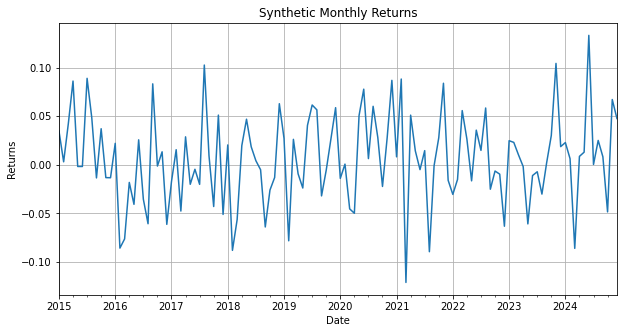

In [212]:
plt.figure(figsize=(10, 4))
time_series.plot(title="Synthetic Monthly Returns", figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid()
plt.show()

### Step 3: Compute and Plot the PACF

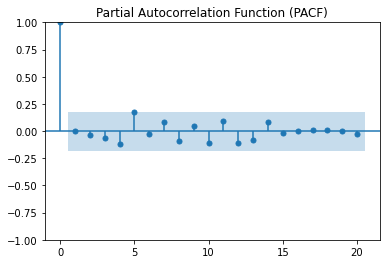

In [213]:
plot_pacf(time_series, lags=20, method='ywm', alpha=0.05, title="Partial Autocorrelation Function (PACF)")
plt.show()

### Step 4: Determine the Best Order (p) for AR Model

The best p is the lag where PACF cuts off (lags beyond are statistically insignificant).
Visual inspection will help decide the order.

- Notice that the last lag that is statistically significant and above the confidence level is lag 5, suggesting a value of p=5 for the AR model.



### Step 5: Fit the AR Model

In [221]:
p = 5  # Based on the above PACF plot, the visual analysis suggests p=5
ar_model = AutoReg(time_series, lags=p, old_names=False).fit()

# Display AR Model Summary
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:        Monthly Returns   No. Observations:                  120
Model:                     AutoReg(5)   Log Likelihood                 193.534
Method:               Conditional MLE   S.D. of innovations              0.045
Date:                Sun, 12 Jan 2025   AIC                           -373.067
Time:                        20:11:49   BIC                           -353.853
Sample:                    06-30-2015   HQIC                          -365.268
                         - 12-31-2024                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0050      0.004      1.159      0.247      -0.003       0.014
Monthly Returns.L1     0.0043      0.092      0.047      0.962      -0.176       0.185
Monthly Returns.L2  

### Step 6: Predict Future Values

In [222]:
n_forecast = 12  # Forecast for the next 12 months
forecast = ar_model.predict(start=len(time_series), end=len(time_series) + n_forecast - 1)

In [223]:
forecast

2025-01-31    0.010628
2025-02-28    0.005958
2025-03-31   -0.015580
2025-04-30    0.010600
2025-05-31    0.012465
2025-06-30    0.007193
2025-07-31    0.006848
2025-08-31   -0.000169
2025-09-30    0.004755
2025-10-31    0.005957
2025-11-30    0.005436
2025-12-31    0.005797
Freq: M, dtype: float64

In [224]:
# Generate a date index for the forecast starting one month after the last date in time_series
last_date = time_series.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_forecast, freq='M')
# Convert forecasted values to a Series with the new date index
forecast_series = pd.Series(forecast.values, index=forecast_dates, name="Forecasted Returns")
forecast_series

2025-01-31    0.010628
2025-02-28    0.005958
2025-03-31   -0.015580
2025-04-30    0.010600
2025-05-31    0.012465
2025-06-30    0.007193
2025-07-31    0.006848
2025-08-31   -0.000169
2025-09-30    0.004755
2025-10-31    0.005957
2025-11-30    0.005436
2025-12-31    0.005797
Freq: M, Name: Forecasted Returns, dtype: float64

### Step 7: Visualize Forecasted Values

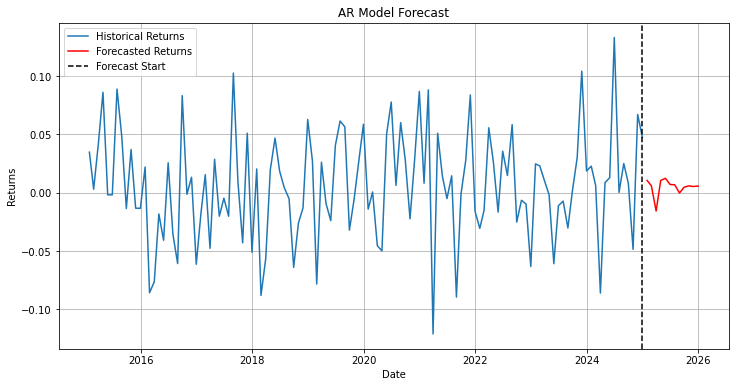

In [225]:
plt.figure(figsize=(12, 6))
plt.plot(time_series, label="Historical Returns")
plt.plot(forecast_series, label="Forecasted Returns", color="red")
plt.axvline(x=time_series.index[-1], color="black", linestyle="--", label="Forecast Start")
plt.title("AR Model Forecast")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()

### Optional: Evaluate Model Performance (In-Sample)

In [226]:
predicted = ar_model.predict(start=p, end=len(time_series) - 1)
actual = time_series[p:]
mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error (In-Sample): {mse:.5f}")


Mean Squared Error (In-Sample): 0.00202


### Plot Actual vs Predicted Values

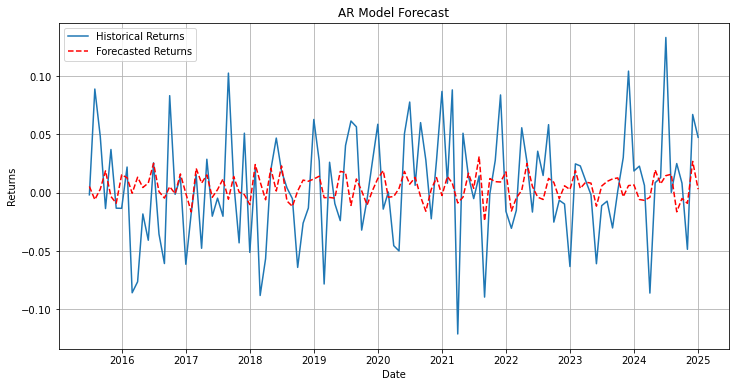

In [227]:
plt.figure(figsize=(12, 6))
plt.plot(actual, label="Historical Returns")
plt.plot(predicted, label="Forecasted Returns", color="red", linestyle="--")
#plt.axvline(x=time_series.index[-1], color="black", linestyle="--", label="Forecast Start")
plt.title("AR Model Forecast")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid()
plt.show()